<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip3 install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [3]:
#Importing the necessary libraries

import warnings

warnings.filterwarnings("ignore")

# Data manipulation libs
import numpy as np
import pandas as pd

# Data split libs
from sklearn.model_selection import train_test_split

# oversample and undersample of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# Data visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset

In [5]:
visa_data = pd.read_csv('/content/drive/My Drive/EasyVisa.csv')
#copy of data to work with
data = visa_data

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [6]:
#Printing the first 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [7]:
print(f'The shape of the data {data.shape}')
print(f'Data have {data.isnull().sum().sum()} null values')
data.nunique()

The shape of the data (25480, 12)
Data have 0 null values


,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


#### Check the data types of the columns for the dataset

In [8]:
data.info()
print(f'There are totoal {data.shape[1]} columns and only 3 columns have numerical data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
There are totoal 12 columns and only 3 columns have numerical data


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [10]:
data.loc[data['no_of_employees'] < 0].shape
print(f'There are {data.loc[data["no_of_employees"] < 0].shape[0]} rows with negative employees data')
#converting negative values to absolute as it looks like the data entry is incorrect
data['no_of_employees'] = data['no_of_employees'].abs()

There are 33 rows with negative employees data


#### Let's check the count of each unique category in each of the categorical variables

In [11]:
# All catrgorical variables
category_col = list(data.select_dtypes("object").columns)

# Count of each unique value in each column
for column in category_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [12]:
#case_id is unique value and occurs for each row, dropping the column.
print(f'Number of unique values in case_id column: {data["case_id"].nunique()}')
data.drop(["case_id"], axis=1, inplace=True)

Number of unique values in case_id column: 25480


### Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
#function to create box plot
def plot_multiple_boxplots(data, columns, rows=3, cols=4, figsize=(16, 12)):
    """
    Plots multiple boxplots in a grid layout.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot.
    - rows (int, optional): Number of rows in the grid.
    - cols (int, optional): Number of columns in the grid.
    - figsize (tuple, optional): Size of the figure.

    Returns:
    - Displays a grid of boxplots.
    """
    total_plots = len(columns)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, column in enumerate(columns):
        if i < len(axes):  # Ensure we don't exceed available axes
            sns.boxplot(data=data, y=column, ax=axes[i], palette="Set2")
            axes[i].set_title(f"Box Plot: {column}")
            axes[i].set_ylabel(column)

    # Hide any unused subplots in case the total plots are less than rows*cols
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#### Observations on education of employee

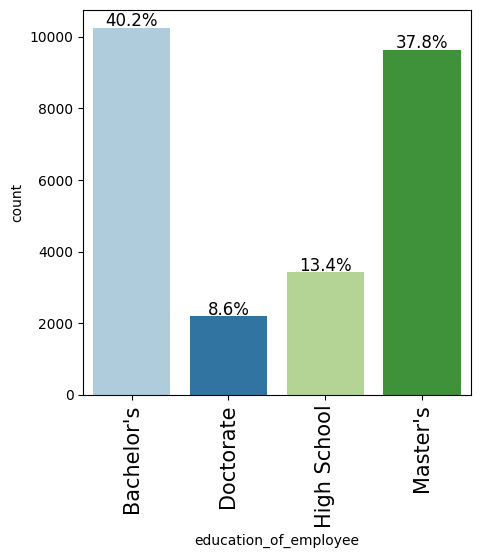

Bachelors and Masters degree holder comprise 78% of the data


In [16]:
labeled_barplot(data, "education_of_employee", perc=True)
print(f'Bachelors and Masters degree holder comprise 78% of the data')

#### Observations on region of employment

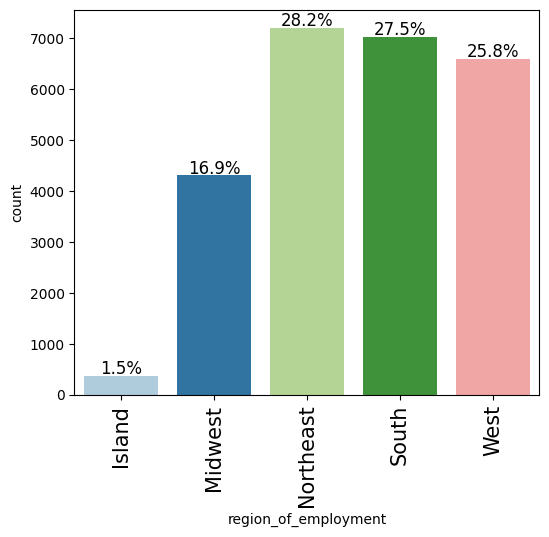

Northeast have the highest percentage in employment followed by south and west


In [17]:
labeled_barplot(data, "region_of_employment", perc=True)
print(f'Northeast have the highest percentage in employment followed by south and west')

#### Observations on job experience

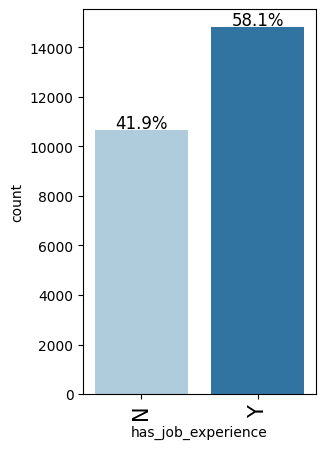

Highest percentage of employees have job experience


In [18]:
labeled_barplot(data, "has_job_experience", perc=True)
print(f'Highest percentage of employees have job experience')

#### Observations on case status

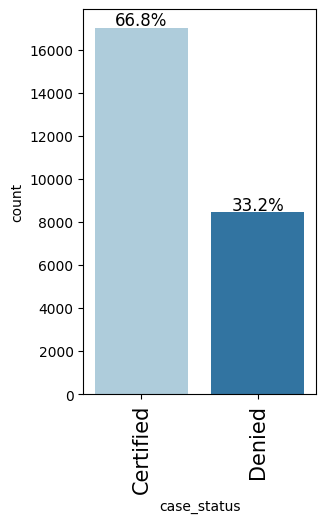

The certified cases are more than denied cases, more than twice which indicates that the data is imbalanced


In [19]:
labeled_barplot(data, "case_status", perc=True)
print(f'The certified cases are more than denied cases, more than twice which indicates that the data is imbalanced')

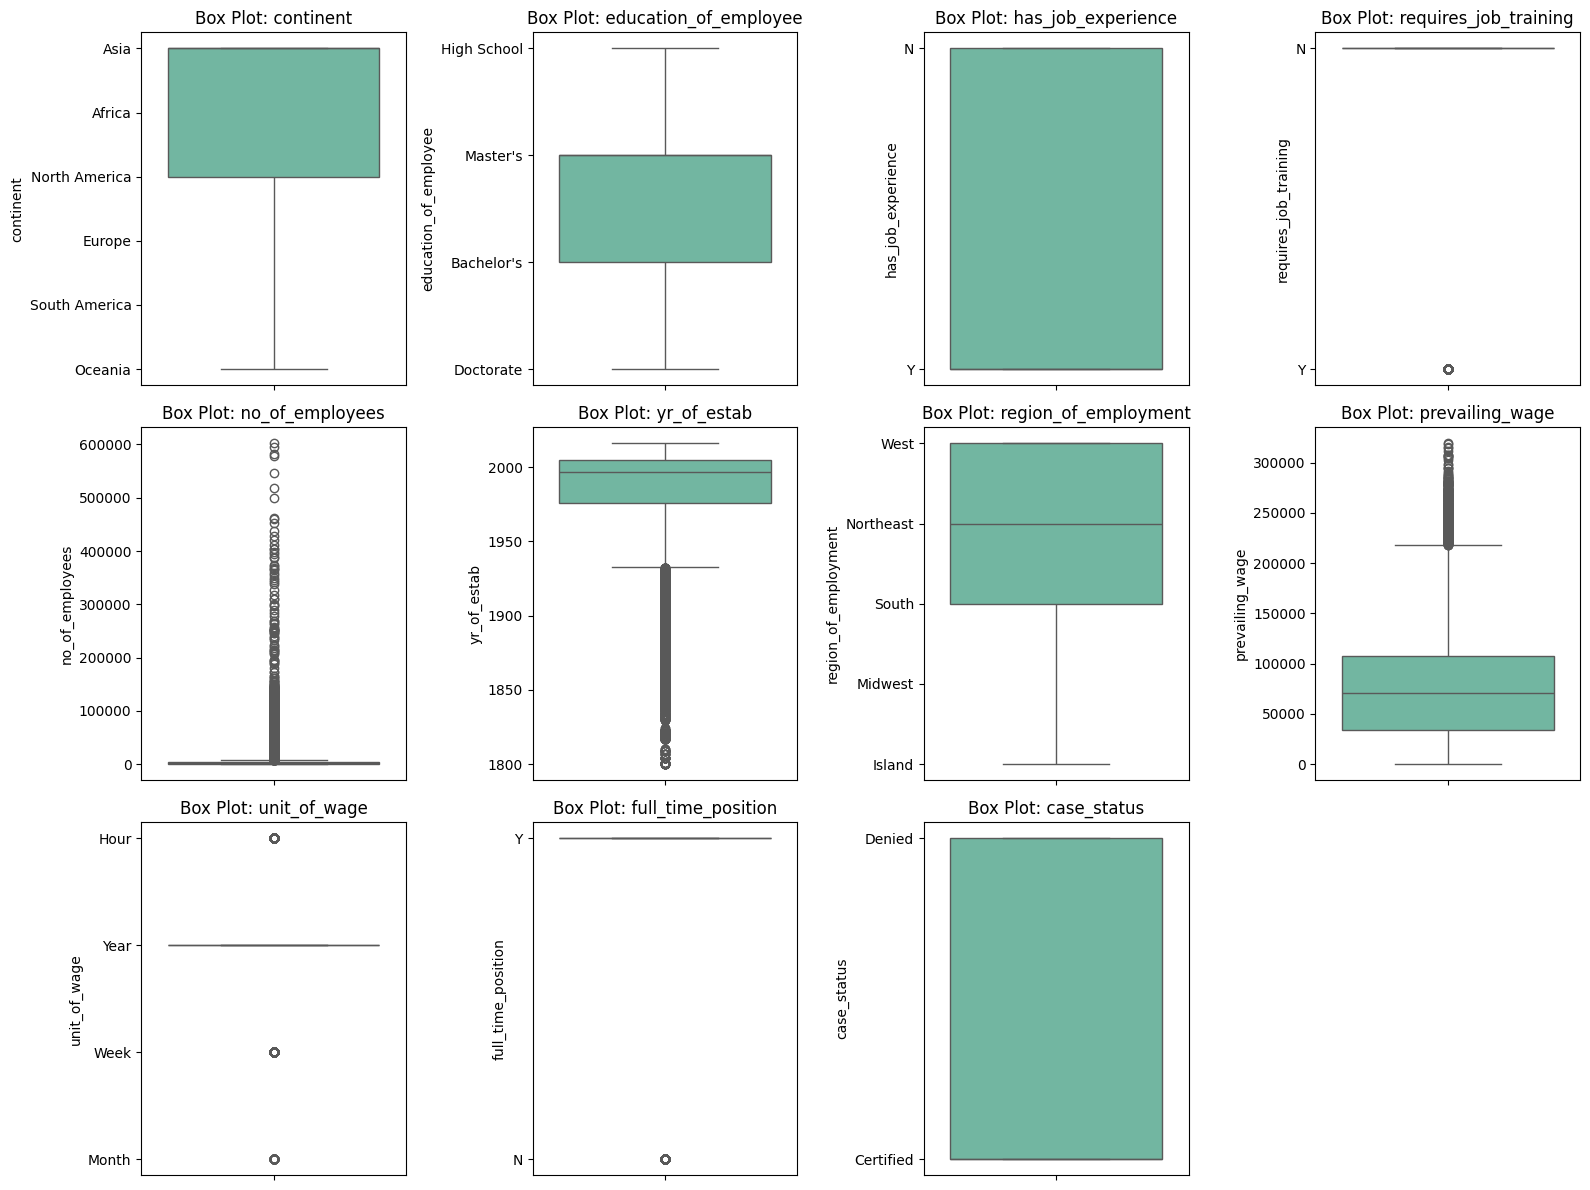

In [20]:
plot_multiple_boxplots(data, data.columns, rows=3, cols=4, figsize=(16, 12))

### Bivariate Analysis

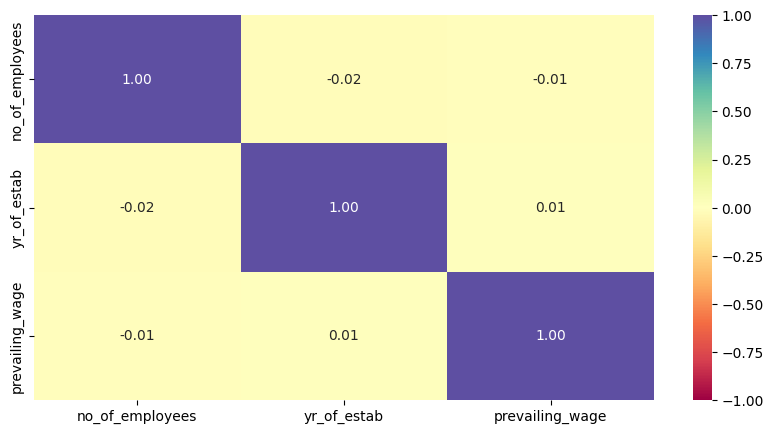

In [21]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


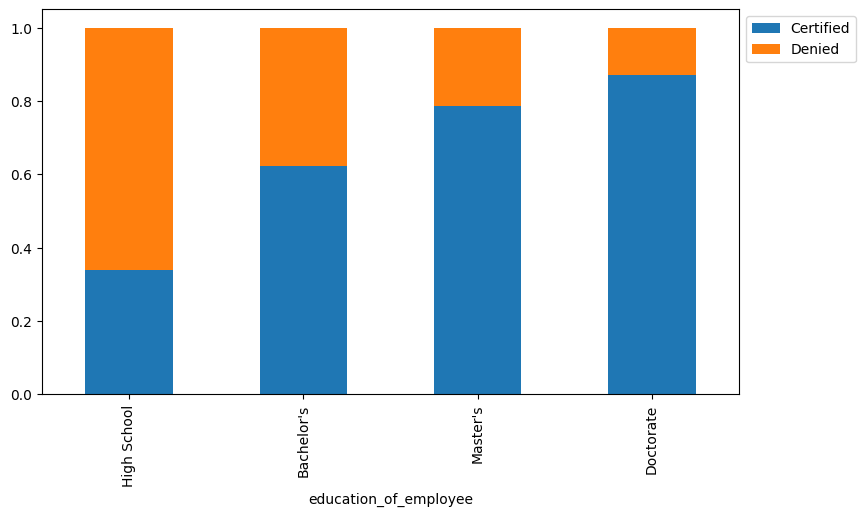

There are significant amount of denials in high school and the opposite in doctorates


In [24]:
stacked_barplot(data, "education_of_employee", "case_status")
print(f'There are significant amount of denials in high school and the opposite in doctorates')

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


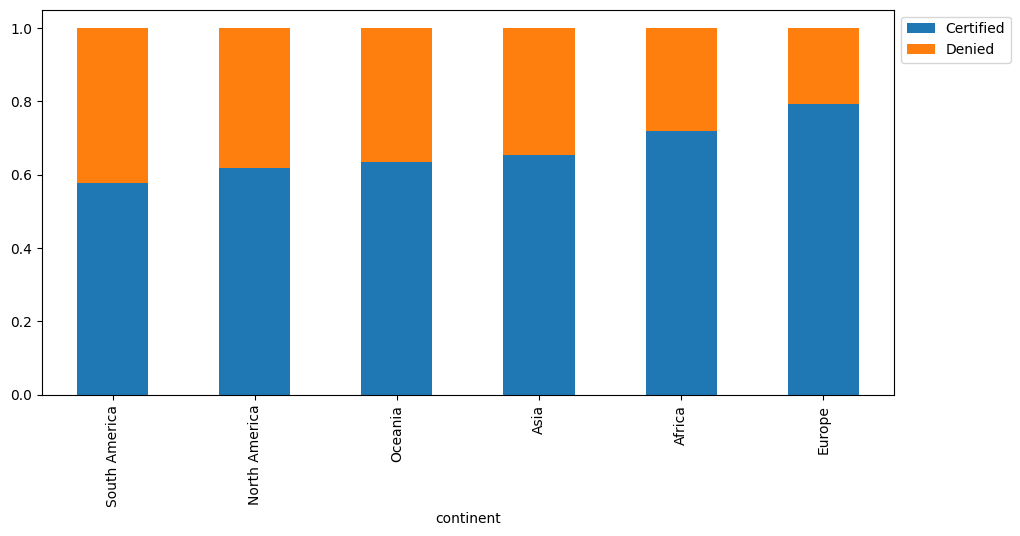

The certified and denied status are almost symmetically spread with respect to the continents


In [25]:
stacked_barplot(data, 'continent', 'case_status' )
print(f'The certified and denied status are almost symmetically spread with respect to the continents')

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


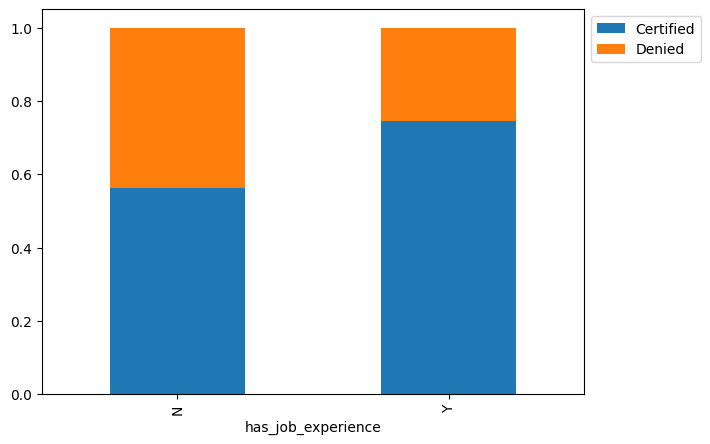

There are more certified cases if the employees have prior job experience


In [26]:
stacked_barplot(data, 'has_job_experience', 'case_status' )
print(f'There are more certified cases if the employees have prior job experience')

#### Checking if the prevailing wage is similar across all the regions of the US

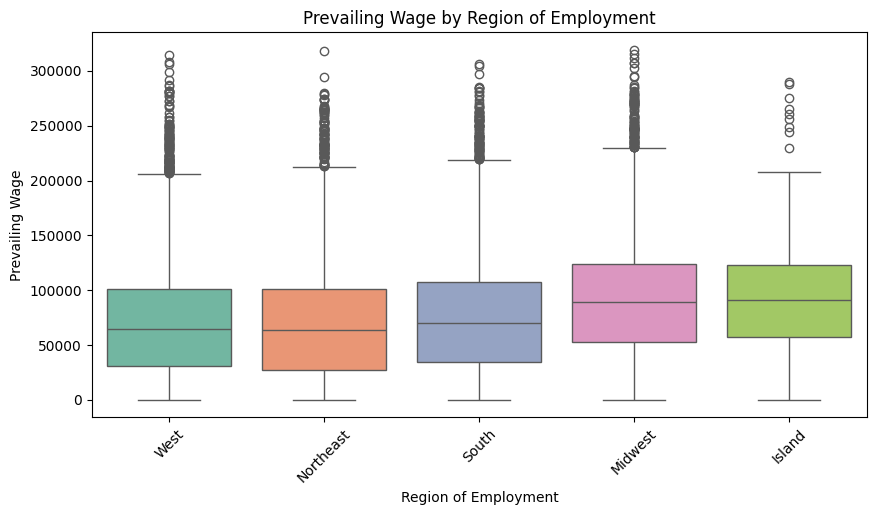

The prevailing wage of west, northwest and south are almost similar in all quartiles, Midwest and Island also share the similar distribution among themselves


In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="Set2")
plt.title("Prevailing Wage by Region of Employment")
plt.xlabel("Region of Employment")
plt.ylabel("Prevailing Wage")
plt.xticks(rotation=45)  # Rotates x-axis labels if needed
plt.show()
print(f'The prevailing wage of west, northwest and south are almost similar in all quartiles, Midwest and Island also share the similar distribution among themselves')

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

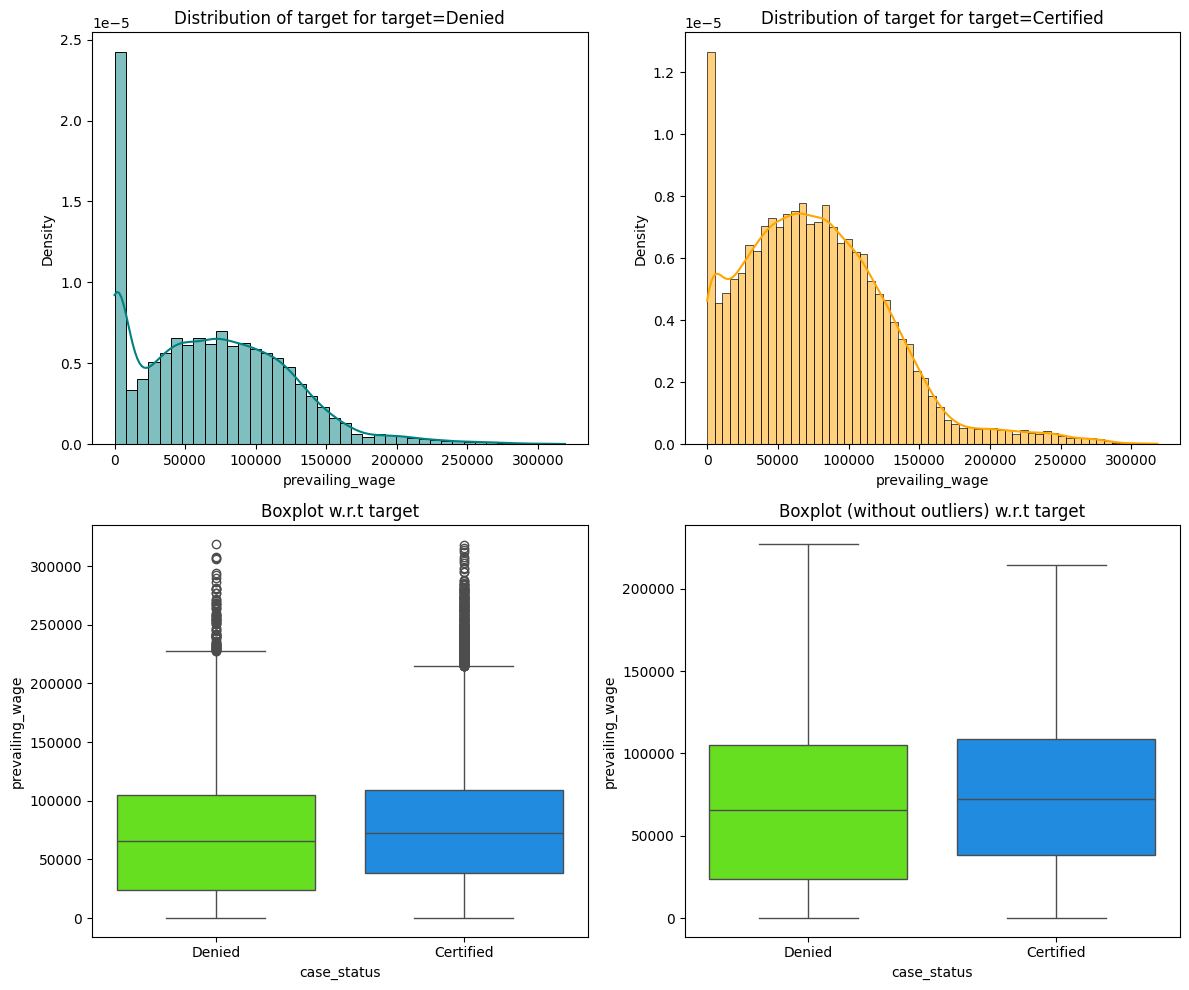

Both certified and denied cases are right skewed with some mode patterns in the middle


In [28]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status' )
print(f'Both certified and denied cases are right skewed with some mode patterns in the middle')

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


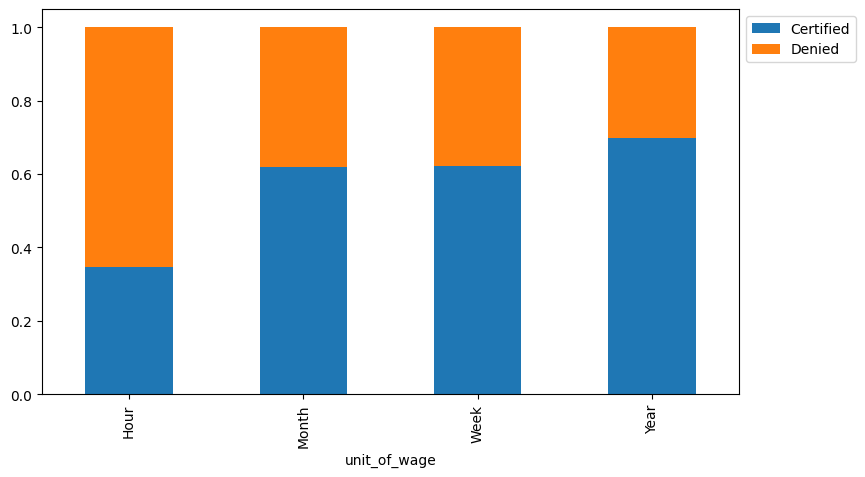

While week and monthly wages have less data to determine the case_status, Year and Hour wages are contradicting each other where there are higher certified case_status in yearly wage employees and lower certified case_status in hourly wage employees


In [29]:
stacked_barplot(data, 'unit_of_wage','case_status')
print(f'While week and monthly wages have less data to determine the case_status, Year and Hour wages are contradicting each other where there are higher certified case_status in yearly wage employees and lower certified case_status in hourly wage employees')

## Data Pre-processing

### Outlier Check

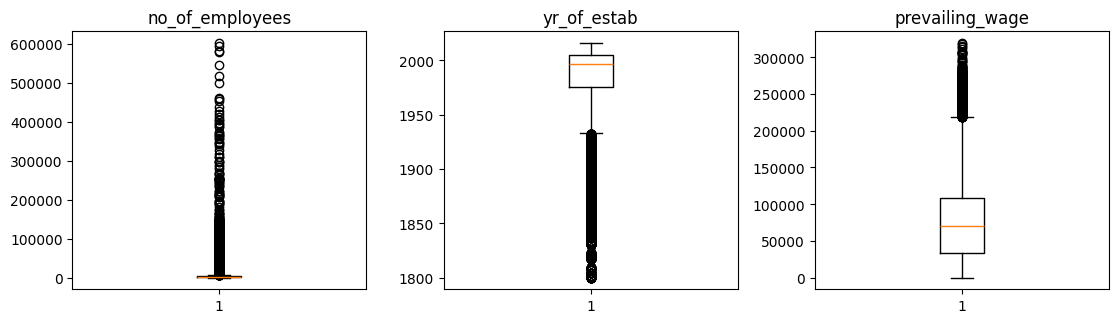

There are outliers in every numeric cloumn data, no_of_employees, yr_of_estab and prevailing_wage
Treating the outliers would hurt the model as we are considering tree, bagging and boosting models and also outliers are part of the data and not noise


In [30]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
print(f'There are outliers in every numeric cloumn data, no_of_employees, yr_of_estab and prevailing_wage')
print(f'Treating the outliers would hurt the model as we are considering tree, bagging and boosting models and also outliers are part of the data and not noise')

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [31]:
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(columns=['case_status'])
y = data["case_status"]
# encoding the categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print("Class distribution in y before splitting:", np.bincount(y))
# split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check distribution after first split
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_val:", np.bincount(y_val))

# split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=42,stratify=y_val
)


# Check distribution after second split
print("Class distribution in y_val:", np.bincount(y_val))
print("Class distribution in y_test:", np.bincount(y_test))

Class distribution in y before splitting: [ 8462 17018]
Class distribution in y_train: [ 5923 11913]
Class distribution in y_val: [2539 5105]
Class distribution in y_val: [2285 4594]
Class distribution in y_test: [254 511]


In [32]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_val Shape: {y_val.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (17836, 21)
X_val Shape: (6879, 21)
X_test Shape: (765, 21)
y_train Shape: (17836,)
y_val Shape: (6879,)
y_test Shape: (765,)


## Model Building

### Model Evaluation Criterion
Provide some reasoning for choosing the metric here : ______

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [35]:
# Define scorers
scorers = {
    "F1": metrics.make_scorer(metrics.f1_score),
    "Recall": metrics.make_scorer(metrics.recall_score),
    "Accuracy": metrics.make_scorer(metrics.accuracy_score),
    "Precision": metrics.make_scorer(metrics.precision_score),
}

### Model building with original data

*   Creating a function to build models
*  Function arguments are X(original, oversampled and undersampled), y(original, oversampled and undersampled)




In [36]:
# Reusable function for all model building and scores
def model_builder(X_data, y_data):
  models = []  # List to store all the models

  # Appending models into the list
  models.append(("Bagging", BaggingClassifier(random_state=42))) #Bagging model with random_state=42
  models.append(("Random forest",RandomForestClassifier(random_state=42))) #Random Forest with random_state=42
  models.append(("GBM", GradientBoostingClassifier(random_state=42))) #Gradient Boosting model with random_state=42
  models.append(("Adaboost", AdaBoostClassifier(random_state=42))) #Adaboost with random_state=42
  models.append(("dtree", DecisionTreeClassifier(random_state=42))) #Decision Tree with random_state=42

  cv_results_dict = {} #Dictionary for storing cross validation results set
  validation_results_dict = {} #Dictionary for storing validation results set


  # mean cross validated score
  print("\n" "Cross-Validation performance on training dataset:" "\n")

  for name, model in models:
      scores_dict = {}
      kfold = StratifiedKFold(
              n_splits=5, shuffle=True, random_state=42
          )  # Cross-validation strategy
      for score_name, score_func in scorers.items():
          cv_result = cross_val_score(
              estimator=model, X=X_data, y=y_data, scoring = score_func,cv=kfold, n_jobs=-1
          )
          scores_dict[score_name] = cv_result.mean()
      cv_results_dict[name] = scores_dict

  cv_results_df = pd.DataFrame(cv_results_dict).T
  print(cv_results_df)

  print("\n" "Validation Performance:" "\n")

  for name, model in models:
      model.fit(X_data, y_data)  # Train the model
      scores_dict = {}

      for score_name, score_func in scorers.items():
          score_value = score_func(model, X_val, y_val)
          scores_dict[score_name] = score_value
      validation_results_dict[name] = scores_dict  # Add model's results to main dictionary
  # Convert dictionary to DataFrame
  validation_results_df = pd.DataFrame(validation_results_dict).T  # Transpose to get models as rows

  # Print the DataFrame
  print(validation_results_df)
  return cv_results_df, validation_results_df  #Return DataFrames

In [37]:
#Reusable function for plotting box-plot for cross-validation with different scores on train and validation set
def plot_boxplots(cv_results_df, validation_results_df):
  # Cross-Validation Performance Data
  cv_data = {
      "Model": ["Bagging", "Random forest", "GBM", "Adaboost", "dtree"],
      "F1": cv_results_df['F1'],
      "Recall": cv_results_df['Recall'],
      "Accuracy": cv_results_df['Accuracy'],
      "Precision": cv_results_df['Precision'],
  }
  cv_df = pd.DataFrame(cv_data)

  # Validation Performance Data
  val_data = {
      "Model": ["Bagging", "Random forest", "GBM", "Adaboost", "dtree"],
      "F1": validation_results_df['F1'],
      "Recall": validation_results_df['Recall'],
      "Accuracy": validation_results_df['Accuracy'],
      "Precision": validation_results_df['Precision'],
  }
  val_df = pd.DataFrame(val_data)

  # Creating Box Plots for Cross-Validation Performance
  plt.figure(figsize=(10, 6))
  cv_df.drop(columns=["Model"]).boxplot()
  plt.title("Cross-Validation Performance")
  plt.ylabel("Score")
  plt.xticks(rotation=0)
  plt.grid(True)
  plt.show()

  # Creating Box Plots for Validation Performance
  plt.figure(figsize=(10, 6))
  val_df.drop(columns=["Model"]).boxplot()
  plt.title("Validation Performance")
  plt.ylabel("Score")
  plt.xticks(rotation=0)
  plt.grid(True)
  plt.show()

In [38]:
#Building model with original data using X_train and y_train as inputs to model builder function and storing returned df for next code block
#Calculating performance scores of each model on training data and validation data
cv_results_df, validation_results_df = model_builder(X_train, y_train)



Cross-Validation performance on training dataset:

                     F1    Recall  Accuracy  Precision
Bagging        0.777314  0.777806  0.702344   0.776856
Random forest  0.806288  0.841099  0.730097   0.774284
GBM            0.824313  0.874171  0.751122   0.779839
Adaboost       0.820033  0.887351  0.739853   0.762245
dtree          0.743871  0.737179  0.660966   0.750748

Validation Performance:

                     F1    Recall  Accuracy  Precision
Bagging        0.772170  0.774271  0.694868   0.770080
Random forest  0.796661  0.831084  0.716674   0.764977
GBM            0.820639  0.872442  0.745312   0.774642
Adaboost       0.814726  0.883979  0.731502   0.755535
dtree          0.737129  0.735525  0.649658   0.738741


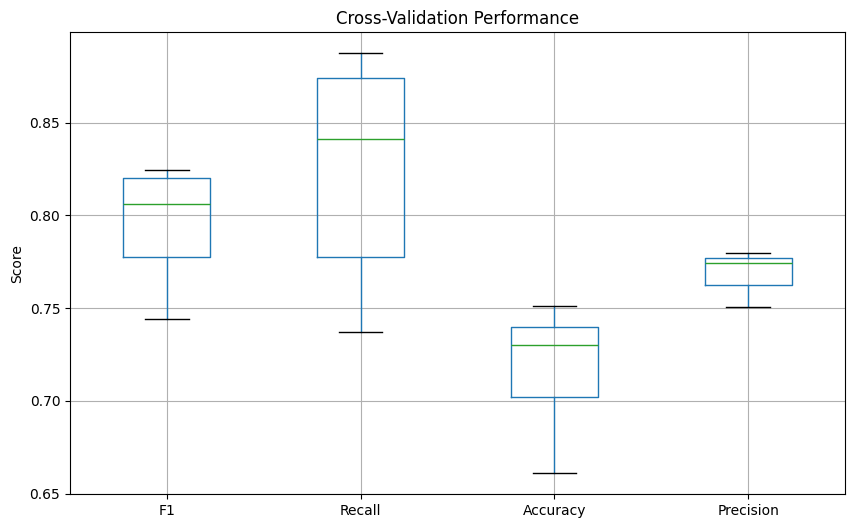

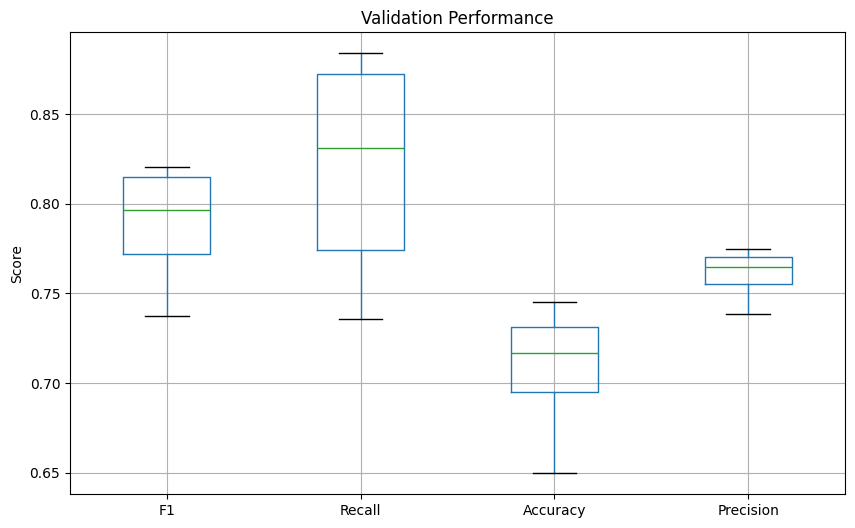

In [39]:
#Plotting box plots for score with original data
plot_boxplots(cv_results_df, validation_results_df)

#### Defining scorer to be used for cross-validation and hyperparameter tuning
### F1 score considering the data is moderately imbalanced and recall and precision are equally important in this use case

### Model Building with oversampled data

In [40]:
# Checking what is the best sampling_strategy for SMOTE
# Define multiple classifiers
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "dtree": DecisionTreeClassifier(random_state=42),
}

# Define sampling strategies to test
sampling_strategies = [0.5, 0.7, 1.0]

best_strategy = None
best_avg_f1 = 0  # To track the best overall strategy

# Store results for comparison
results = {}

# Loop through different sampling strategies
for strategy in sampling_strategies:
    # Check if the strategy is valid., strategy 0.3 doesn't work due to no samples being available at y_train for smapling
    if strategy <= 1 and strategy > 0:  # This will skip invalid strategies and prevent further issues
        smote = SMOTE(sampling_strategy=strategy, k_neighbors=5, random_state=42)
        X_train_over_sampled, y_train_over_sampled = smote.fit_resample(X_train, y_train)

        model_f1_scores = []

        # Train and evaluate each model
        for model_name, model in models.items():
            model.fit(X_train_over_sampled, y_train_over_sampled)
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred)
            model_f1_scores.append(f1)

        # Compute the average F1-score across all models
        avg_f1 = np.mean(model_f1_scores)
        results[strategy] = avg_f1

        # Update the best strategy if current one is better
        if avg_f1 > best_avg_f1:
            best_avg_f1 = avg_f1
            best_strategy = strategy
    else:
        print(f"Skipping invalid sampling strategy: {strategy}")

# Print results
print("Performance across different sampling strategies:")
for strategy, f1 in results.items():
    print(f"Sampling Strategy: {strategy}, Avg F1-score: {f1:.4f}")

print(f"\nBest Sampling Strategy: {best_strategy} with Avg F1-score: {best_avg_f1:.4f}")

Performance across different sampling strategies:
Sampling Strategy: 0.5, Avg F1-score: 0.7889
Sampling Strategy: 0.7, Avg F1-score: 0.7850
Sampling Strategy: 1.0, Avg F1-score: 0.7825

Best Sampling Strategy: 0.5 with Avg F1-score: 0.7889


In [41]:
#Picking Sampling stratey as 0.5 as it is yielding to maximum f1 score

print(np.bincount(y_train))
# To avoid overfitting data since the data imbalanced, We will be using 0.5 for sampling_strategy to make the sample
# moderately balanced
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42) # k-nearest neighbors and sampling strategy
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

[ 5923 11913]
After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 5956 

After OverSampling, the shape of train_X: (17869, 21)
After OverSampling, the shape of train_y: (17869,) 



In [42]:
#Building model with original data using X_train_over and y_train_over as inputs to model builder function and storing returned df for next code block
#Calculating performance scores of each model on over sampled training data and validation data
cv_results_df, validation_results_df = model_builder(X_train_over, y_train_over)



Cross-Validation performance on training dataset:

                     F1    Recall  Accuracy  Precision
Bagging        0.772949  0.771426  0.697857   0.774486
Random forest  0.800550  0.833794  0.723040   0.769896
GBM            0.822666  0.872744  0.749175   0.778068
Adaboost       0.819102  0.889196  0.738151   0.759273
dtree          0.742171  0.739947  0.657283   0.744443

Validation Performance:

                     F1    Recall  Accuracy  Precision
Bagging        0.773409  0.774924  0.696758   0.771899
Random forest  0.799082  0.833261  0.720163   0.767596
GBM            0.821870  0.875272  0.746620   0.774610
Adaboost       0.814621  0.880496  0.732374   0.757916
dtree          0.735272  0.729430  0.649222   0.741208


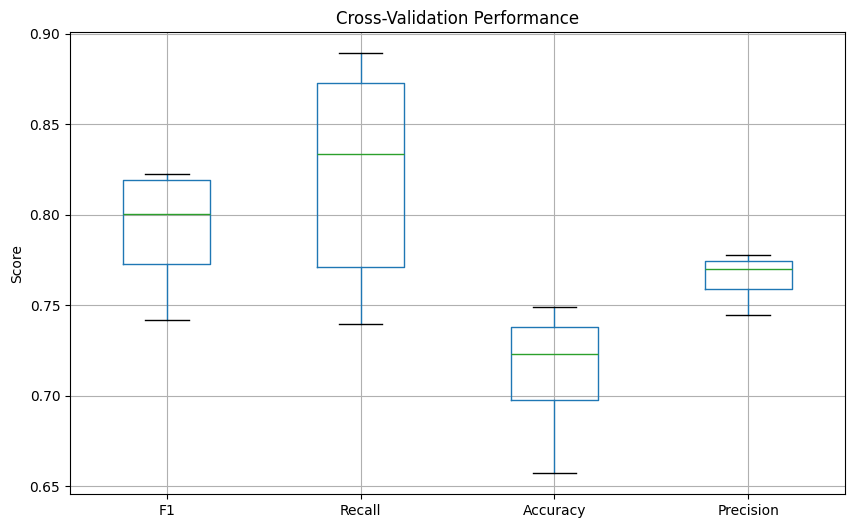

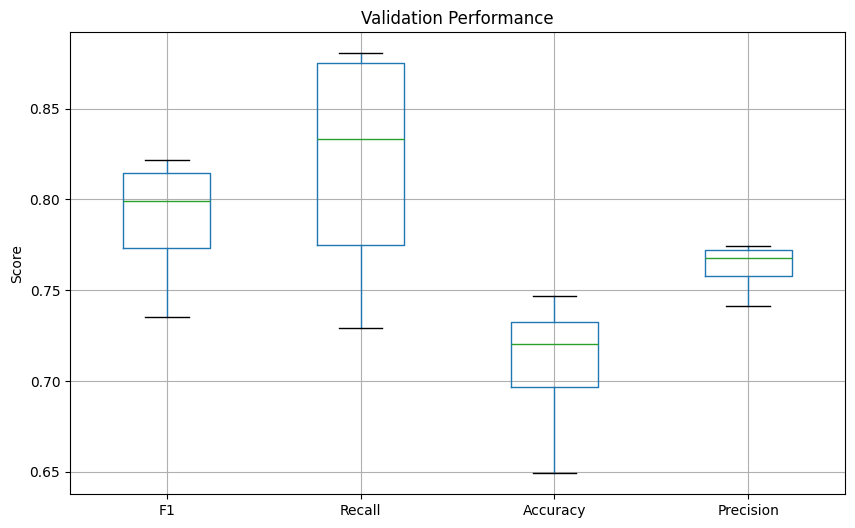

In [43]:
#Plotting box plots for score with over sampled data
plot_boxplots(cv_results_df, validation_results_df)

### Model Building with undersampled data

In [44]:
#Finding the best strategy to under sample the data

# Checking what is the best sampling_strategy for SMOTE
# Define multiple classifiers
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "dtree": DecisionTreeClassifier(random_state=42),
}

# Define sampling strategies to test
sampling_strategies = [0.5, 0.7, 1.0]

best_strategy = None
best_avg_f1 = 0  # To track the best overall strategy

# Store results for comparison
results = {}

# Loop through different sampling strategies
for strategy in sampling_strategies:
    # Check if the strategy is valid
    if strategy <= 1 and strategy > 0:  # This will skip invalid strategies and prevent further issues
        random_under_sample = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
        X_train_under_sampled, y_train_under_sampled = random_under_sample.fit_resample(X_train, y_train)

        model_f1_scores = []

        # Train and evaluate each model
        for model_name, model in models.items():
            model.fit(X_train_under_sampled, y_train_under_sampled)
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred)
            model_f1_scores.append(f1)

        # Compute the average F1-score across all models
        avg_f1 = np.mean(model_f1_scores)
        results[strategy] = avg_f1

        # Update the best strategy if current one is better
        if avg_f1 > best_avg_f1:
            best_avg_f1 = avg_f1
            best_strategy = strategy
    else:
        print(f"Skipping invalid sampling strategy: {strategy}")

# Print results
print("Performance across different sampling strategies:")
for strategy, f1 in results.items():
    print(f"Sampling Strategy: {strategy}, Avg F1-score: {f1:.4f}")

print(f"\nBest Sampling Strategy: {best_strategy} with Avg F1-score: {best_avg_f1:.4f}")

Performance across different sampling strategies:
Sampling Strategy: 0.5, Avg F1-score: 0.7885
Sampling Strategy: 0.7, Avg F1-score: 0.7678
Sampling Strategy: 1.0, Avg F1-score: 0.7290

Best Sampling Strategy: 0.5 with Avg F1-score: 0.7885


In [45]:
#Picking under Sampling stratey as 0.5 as it is yielding to maximum f1 score

print(np.bincount(y_train))
# To avoid overfitting data since the data imbalanced, I will be using 0.5 for sampling_strategy to make the sample
# moderately balanced
# Synthetic Minority Over Sampling Technique
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42) ## sampling strategy
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_under == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_under.shape))

[ 5923 11913]
After UnderSampling, counts of label '1': 11846
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (17769, 21)
After UnderSampling, the shape of train_y: (17769,) 



In [46]:
#Building model with undersampled data using X_train_under and y_train_under as inputs to model builder function and storing returned df for next code block
# Calculating performance on training data and validation data
cv_results_df, validation_results_df = model_builder(X_train_under, y_train_under)


Cross-Validation performance on training dataset:

                     F1    Recall  Accuracy  Precision
Bagging        0.776767  0.774270  0.703303   0.779291
Random forest  0.804071  0.839101  0.727391   0.771863
GBM            0.823399  0.874218  0.750014   0.778180
Adaboost       0.817943  0.884602  0.737464   0.760635
dtree          0.738114  0.732484  0.653498   0.743865

Validation Performance:

                     F1    Recall  Accuracy  Precision
Bagging        0.770668  0.772094  0.693124   0.769247
Random forest  0.798122  0.832608  0.718709   0.766379
GBM            0.821158  0.873531  0.745893   0.774710
Adaboost       0.814261  0.877449  0.732665   0.759563
dtree          0.738472  0.737266  0.651257   0.739681


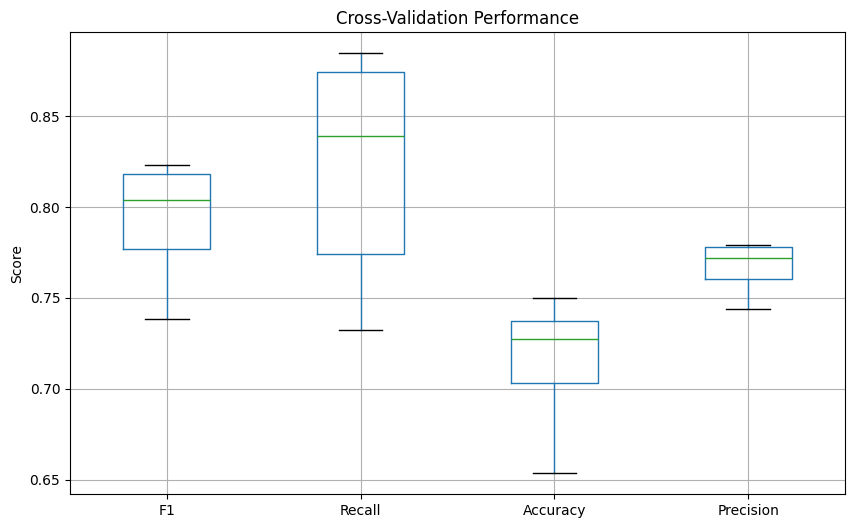

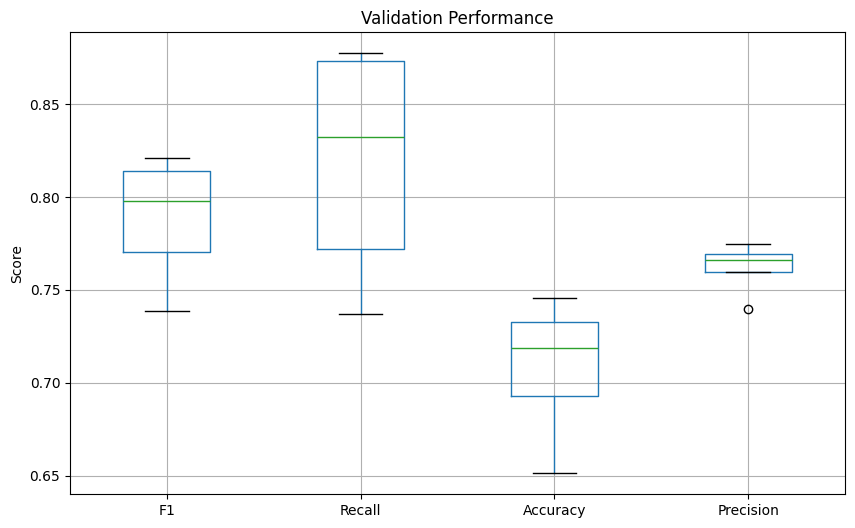

In [47]:
#Plotting box plots for score with under sampled data
plot_boxplots(cv_results_df, validation_results_df)

## Hyperparameter Tuning

In [81]:
# we cannot certify an employee who is not eligible to be certified - Precision
# we cannot also miss the talent who are supposed to be certified but denied - Recall
# Chosing f1_score as ultimate decision as both precision and recall are equally important in determining the certified vs denied
final_scorer = metrics.make_scorer(metrics.f1_score);

In [49]:
#Reusable functions in hyperparameter tuning
def model_random_search_cv(estimator,param_distributions,scoring):
  return RandomizedSearchCV(
          estimator=estimator,
          param_distributions=param_distributions,
          n_iter=50,
          n_jobs=-1,
          scoring=scoring,
          cv=5,
          random_state=42
  )

### Tuning Random forest using undersampled data

In [50]:
# Defining model
Model = RandomForestClassifier(random_state=42)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100, 200, 300],  # number of estimators.
    "min_samples_leaf": np.arange(1, 10),  # minimum number of samples in the leaf node.
    "max_features": [np.arange(2, 10, 2), 'sqrt'],  # maximum number of features.
    "max_samples": np.arange(0.5, 1.0, 0.1)  # maximum number of samples.
}

# Calling RandomizedSearchCV
randomized_cv = model_random_search_cv(Model,param_grid,final_scorer)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)  # Fitting the data into the model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 6, 'max_samples': 0.8999999999999999, 'max_features': 'sqrt'} with CV score=0.824385286102097:


In [51]:
#modeling random forest with best identified parameters
tuned_model_rf = RandomForestClassifier(
    max_features=randomized_cv.best_params_['max_features'],
    max_samples=randomized_cv.best_params_['max_samples'],
    min_samples_leaf=randomized_cv.best_params_['min_samples_leaf'],
    n_estimators=randomized_cv.best_params_['n_estimators'],
    random_state=42
)

tuned_model_rf.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=0.8999999999999999, min_samples_leaf=6,
                       n_estimators=300, random_state=42)

   Accuracy    Recall  Precision        F1
0  0.789634  0.902583   0.805363  0.851206
None


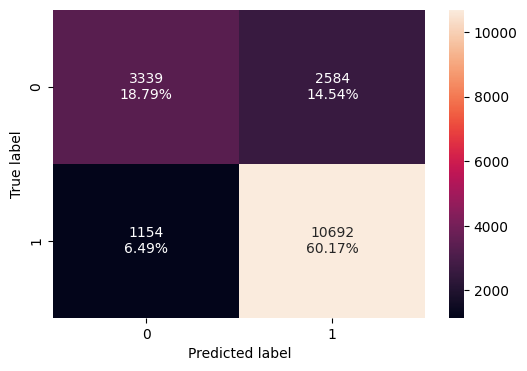

In [52]:
rf_train_performance = model_performance_classification_sklearn(tuned_model_rf, X_train_under, y_train_under)
print(rf_train_performance)
#Confusion matrix for Random forest with under sampled data
cm_rf = confusion_matrix_sklearn(tuned_model_rf, X_train_under, y_train_under)
print(cm_rf)

   Accuracy    Recall  Precision       F1
0  0.743858  0.870266   0.774206  0.81943
None


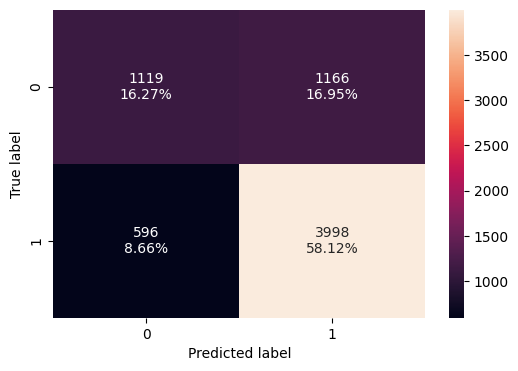

In [53]:
rf_val_performance = model_performance_classification_sklearn(tuned_model_rf, X_val, y_val)
print(rf_val_performance)
#Confusion matrix for Random forest with under sampled data
cm_rf_val = confusion_matrix_sklearn(tuned_model_rf, X_val, y_val)
print(cm_rf_val)

### Tuning AdaBoost using oversampled data

In [54]:
# Defining model
Model = AdaBoostClassifier(random_state=42)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=42),
        DecisionTreeClassifier(max_depth=2, random_state=42),
        DecisionTreeClassifier(max_depth=3, random_state=42),
    ]
}

# Calling RandomizedSearchCV
randomized_cv = model_random_search_cv(Model,param_grid,final_scorer)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=42)} with CV score=0.8227092057008802:


In [55]:
##set the best parameters.
tuned_model_ada = AdaBoostClassifier(
    n_estimators= randomized_cv.best_params_['n_estimators'],
    learning_rate= randomized_cv.best_params_['learning_rate'],
    estimator= randomized_cv.best_params_['estimator']
)

tuned_model_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=100)

   Accuracy    Recall  Precision        F1
0  0.749902  0.874171   0.778093  0.823339
None


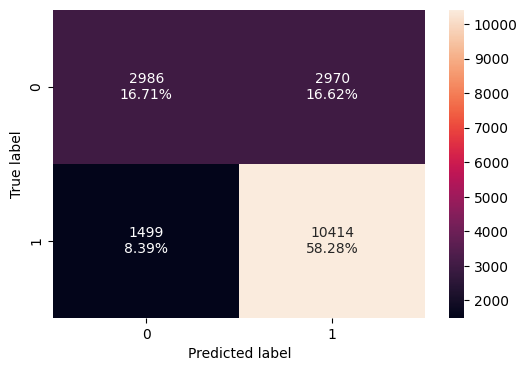

In [56]:
ada_train_performance_over_sampled = model_performance_classification_sklearn(tuned_model_ada, X_train_over, y_train_over)
print(ada_train_performance_over_sampled)
#Confusion matrix for Adaboost with over sampled data
cm_ada = confusion_matrix_sklearn(tuned_model_ada, X_train_over, y_train_over)
print(cm_ada)


   Accuracy    Recall  Precision        F1
0  0.743422  0.872442   0.772701  0.819548
None


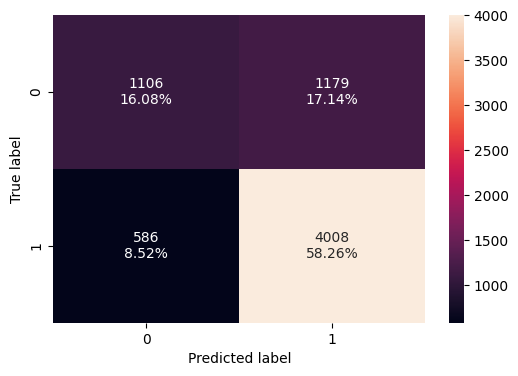

In [57]:
ada_val_performance_over_sampled = model_performance_classification_sklearn(tuned_model_ada, X_val, y_val)
print(ada_val_performance_over_sampled)
#Confusion matrix for Adaboost with over sampled data
cm_ada_val = confusion_matrix_sklearn(tuned_model_ada, X_val, y_val)
print(cm_ada_val)

### Tuning AdaBoost using undersampled data

In [58]:
# Defining model
Model = AdaBoostClassifier(random_state=42)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=42),
        DecisionTreeClassifier(max_depth=2, random_state=42),
        DecisionTreeClassifier(max_depth=3, random_state=42),
    ]
}

# Calling RandomizedSearchCV
randomized_cv = model_random_search_cv(Model,param_grid,final_scorer)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=42)} with CV score=0.822219008383066:


In [59]:
##set the best parameters.
tuned_model_ada_under_sampled = AdaBoostClassifier(
    n_estimators= randomized_cv.best_params_['n_estimators'],
    learning_rate= randomized_cv.best_params_['learning_rate'],
    estimator= randomized_cv.best_params_['estimator']
)

tuned_model_ada_under_sampled.fit(X_train_under, y_train_under)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=200)

   Accuracy    Recall  Precision        F1
0  0.749282  0.876752   0.776175  0.823403
None


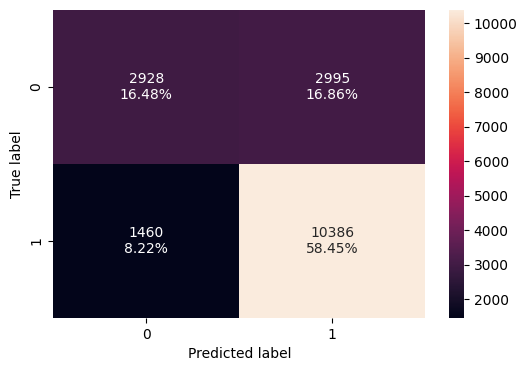

In [60]:
ada_train_performance_under_sampled = model_performance_classification_sklearn(tuned_model_ada_under_sampled, X_train_under, y_train_under)
print(ada_train_performance_under_sampled)
#Confusion matrix for Adaboost with under sampled data
cm_ada_under = confusion_matrix_sklearn(tuned_model_ada_under_sampled, X_train_under, y_train_under)
print(cm_ada_under)

   Accuracy    Recall  Precision        F1
0  0.743277  0.877013   0.770363  0.820236
None


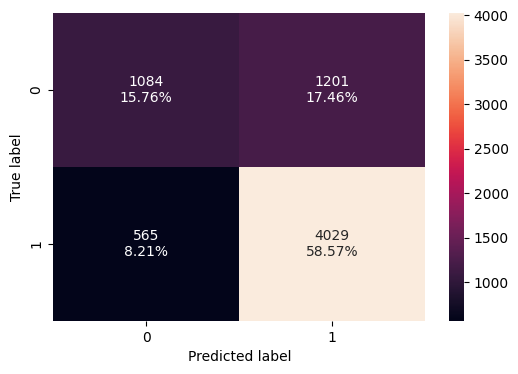

In [61]:
ada_val_performance_under_sampled = model_performance_classification_sklearn(tuned_model_ada_under_sampled, X_val, y_val)
print(ada_val_performance_under_sampled)
#Confusion matrix for Adaboost with under sampled data
cm_ada_under_val = confusion_matrix_sklearn(tuned_model_ada_under_sampled, X_val, y_val)
print(cm_ada_under_val)

### Tuning with Gradient boosting with oversampled data

In [62]:
# Defining model
Model = GradientBoostingClassifier(random_state=42)

# Defining the hyperparameters for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(50, 301, 50),  # Number of boosting stages (50 to 300 in steps of 50)
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Learning rate controls the contribution of each tree
    "subsample": [0.6, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    "max_features": ["sqrt", "log2", None]  # Maximum number of features to consider at each split
}

# Setting up RandomizedSearchCV with cross-validation
randomized_cv = model_random_search_cv(Model,param_grid,final_scorer)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 100, 'max_features': None, 'learning_rate': 0.05} with CV score=0.8242358478718105:


In [63]:
tuned_model_gbm_over_sampled = GradientBoostingClassifier(
    max_features= randomized_cv.best_params_['max_features'],
    subsample= randomized_cv.best_params_['subsample'],
    n_estimators= randomized_cv.best_params_['n_estimators'],
    learning_rate= randomized_cv.best_params_['learning_rate'],
    random_state=42,
)

tuned_model_gbm_over_sampled.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

   Accuracy    Recall  Precision        F1
0  0.752924  0.881726   0.777498  0.826338
None


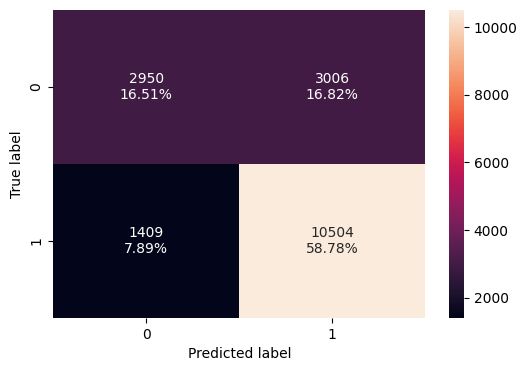

In [64]:
gbm_train_performance_over_sampled = model_performance_classification_sklearn(
    tuned_model_gbm_over_sampled, X_train_over, y_train_over
)
print(gbm_train_performance_over_sampled)
#Confusion matrix for Gradient Boost with over sampled data
cm_gbm_over = confusion_matrix_sklearn(tuned_model_gbm_over_sampled, X_train_over, y_train_over)
print(cm_gbm_over)

   Accuracy    Recall  Precision        F1
0  0.745312  0.879843    0.77108  0.821879
None


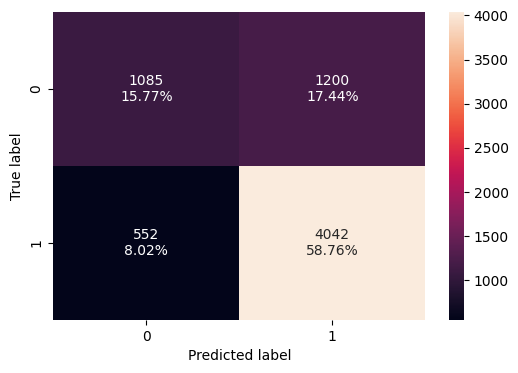

In [65]:
gbm_val_performance_over_sampled = model_performance_classification_sklearn(
    tuned_model_gbm_over_sampled, X_val, y_val
)
print(gbm_val_performance_over_sampled)
#Confusion matrix for Gradient Boost with over sampled data
cm_gbm_over_val = confusion_matrix_sklearn(tuned_model_gbm_over_sampled, X_val, y_val)
print(cm_gbm_over_val)


### Tuning with Gradient boosting with undersampled data

In [66]:
# Defining model
Model = GradientBoostingClassifier(random_state=42)

# Defining the hyperparameters for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(50, 301, 50),  # Number of boosting stages (50 to 300 in steps of 50)
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Learning rate controls the contribution of each tree
    "subsample": [0.6, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    "max_features": ["sqrt", "log2", None]  # Maximum number of features to consider at each split
}

# Setting up RandomizedSearchCV with cross-validation
randomized_cv = model_random_search_cv(Model,param_grid,final_scorer)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 50, 'max_features': None, 'learning_rate': 0.1} with CV score=0.8240239466609045:


In [67]:
tuned_model_gbm_under_sampled = GradientBoostingClassifier(
    max_features= randomized_cv.best_params_['max_features'],
    subsample= randomized_cv.best_params_['subsample'],
    n_estimators= randomized_cv.best_params_['n_estimators'],
    learning_rate= randomized_cv.best_params_['learning_rate'],
    random_state=42,
)

tuned_model_gbm_under_sampled.fit(X_train_under, y_train_under)

GradientBoostingClassifier(n_estimators=50, random_state=42)

   Accuracy   Recall  Precision        F1
0  0.752828  0.87633   0.780057  0.825396
None


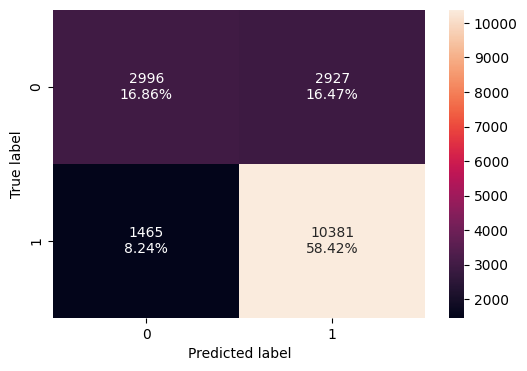

In [68]:
gbm_train_performance_under_sampled = model_performance_classification_sklearn(
    tuned_model_gbm_under_sampled, X_train_under, y_train_under
)
print(gbm_train_performance_under_sampled)
#Confusion matrix for Gradient Boost with under sampled data
cm_gbm_under = confusion_matrix_sklearn(tuned_model_gbm_under_sampled, X_train_under, y_train_under)
print(cm_gbm_under)

   Accuracy    Recall  Precision        F1
0  0.745312  0.874401    0.77369  0.820969
None


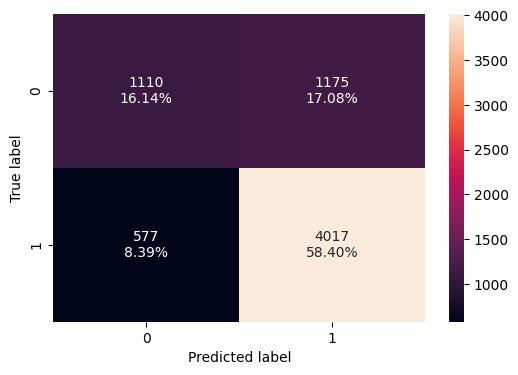

In [69]:
gbm_val_performance_under_sampled = model_performance_classification_sklearn(
    tuned_model_gbm_under_sampled, X_val, y_val
)
print(gbm_val_performance_under_sampled)
#Confusion matrix for Gradient Boost with under sampled data
cm_gbm_under_val = confusion_matrix_sklearn(tuned_model_gbm_under_sampled, X_val, y_val)
print(cm_gbm_under_val)

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [70]:
# training performance comparison

models_train_performance_df = pd.concat(
    [
        rf_train_performance.T,
        ada_train_performance_over_sampled.T,
        ada_train_performance_under_sampled.T,
        gbm_train_performance_over_sampled.T,
        gbm_train_performance_under_sampled.T
    ],
    axis=1,
)
models_train_performance_df.columns = [
    "Random forest with undersampled data",
    "AdaBoost tuned with oversampled data",
    "AdaBoost tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data",
]
print("Training performance comparison:")
models_train_performance_df

Training performance comparison:


,Random forest with undersampled data,AdaBoost tuned with oversampled data,AdaBoost tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data
Accuracy,0.789634,0.749902,0.749282,0.752924,0.752828
Recall,0.902583,0.874171,0.876752,0.881726,0.876330
Precision,0.805363,0.778093,0.776175,0.777498,0.780057
F1,0.851206,0.823339,0.823403,0.826338,0.825396


In [71]:
# validation performance comparison

models_val_performance_df = pd.concat(
    [
        rf_val_performance.T,
        ada_val_performance_over_sampled.T,
        ada_val_performance_under_sampled.T,
        gbm_val_performance_over_sampled.T,
        gbm_val_performance_under_sampled.T
    ],
    axis=1,
)
models_val_performance_df.columns = [
    "Random forest with undersampled data",
    "AdaBoost tuned with oversampled data",
    "AdaBoost tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_performance_df

Validation performance comparison:


,Random forest with undersampled data,AdaBoost tuned with oversampled data,AdaBoost tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data
Accuracy,0.743858,0.743422,0.743277,0.745312,0.745312
Recall,0.870266,0.872442,0.877013,0.879843,0.874401
Precision,0.774206,0.772701,0.770363,0.771080,0.773690
F1,0.819430,0.819548,0.820236,0.821879,0.820969



 Confusion Matrix for ----Random Forest----:

 Confusion Matrix for ----AdaBoost with oversampled data----:

 Confusion Matrix for ----AdaBoost with undersampled data----:

 Confusion Matrix for ----Gradient Boosting with oversampled data----:

 Confusion Matrix for ----Gradient Boosting with undersampled data----:


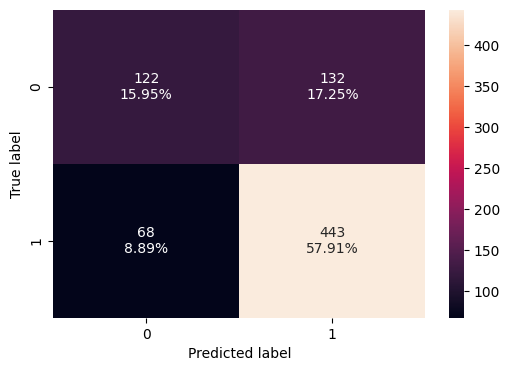

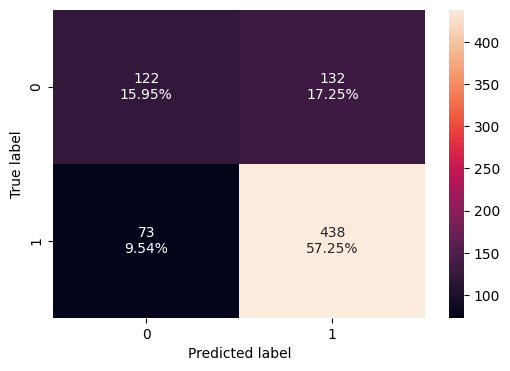

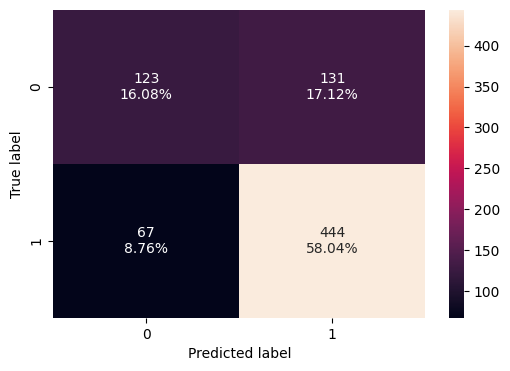

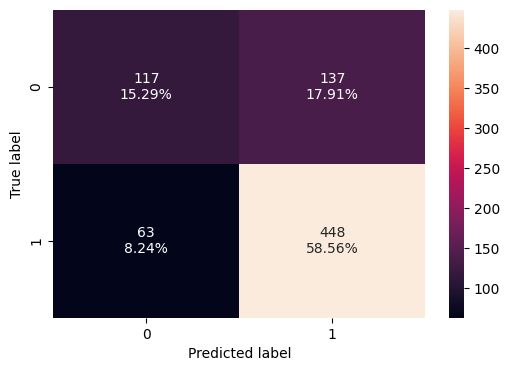

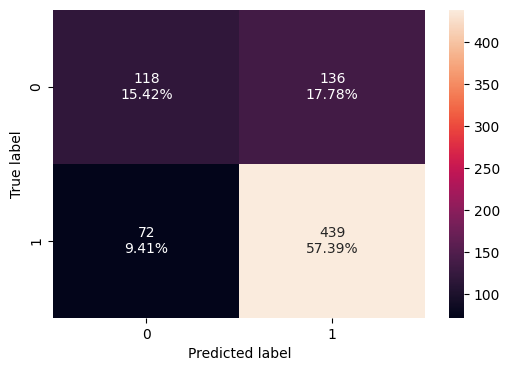

In [72]:
# List of models and labels for test data
models = {
    "Random Forest": tuned_model_rf,
    "AdaBoost with oversampled data": tuned_model_ada,
    "AdaBoost with undersampled data": tuned_model_ada_under_sampled,
    "Gradient Boosting with oversampled data": tuned_model_gbm_over_sampled,
    "Gradient Boosting with undersampled data": tuned_model_gbm_under_sampled
}

# Loop through each model and print its confusion matrix
for model_name, model in models.items():
    print(f"\n Confusion Matrix for ----{model_name}----:")
    cm = confusion_matrix_sklearn(model, X_test, y_test)

In [73]:
#test performance scores

rf_test_performance = model_performance_classification_sklearn(tuned_model_rf, X_test, y_test)
ada_test_performance_over_sampled = model_performance_classification_sklearn(tuned_model_ada, X_test, y_test)
ada_test_performance_under_sampled = model_performance_classification_sklearn(tuned_model_ada_under_sampled, X_test, y_test)
gbm_test_performance_over_sampled = model_performance_classification_sklearn(tuned_model_gbm_over_sampled, X_test, y_test)
gbm_test_performance_under_sampled = model_performance_classification_sklearn(tuned_model_gbm_under_sampled, X_test, y_test)

# validation performance comparison

models_test_performance_df = pd.concat(
    [
        rf_test_performance.T,
        ada_test_performance_over_sampled.T,
        ada_test_performance_under_sampled.T,
        gbm_test_performance_over_sampled.T,
        gbm_test_performance_under_sampled.T
    ],
    axis=1,
)
models_test_performance_df.columns = [
    "Random forest with undersampled data",
    "AdaBoost tuned with oversampled data",
    "AdaBoost tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data",
]
print("Test performance comparison:")
models_test_performance_df


Test performance comparison:


,Random forest with undersampled data,AdaBoost tuned with oversampled data,AdaBoost tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data
Accuracy,0.738562,0.732026,0.741176,0.738562,0.728105
Recall,0.866928,0.857143,0.868885,0.876712,0.859100
Precision,0.770435,0.768421,0.772174,0.765812,0.763478
F1,0.815838,0.810361,0.817680,0.817518,0.808471


In [74]:
# model difference with train and test, to see the smallest difference possible in F1 score
model_train_test_difference = models_train_performance_df - models_test_performance_df
model_train_test_difference

,Random forest with undersampled data,AdaBoost tuned with oversampled data,AdaBoost tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data
Accuracy,0.051072,0.017876,0.008106,0.014362,0.024723
Recall,0.035656,0.017028,0.007867,0.005014,0.017230
Precision,0.034928,0.009672,0.004001,0.011686,0.016579
F1,0.035368,0.012978,0.005724,0.008820,0.016924


In [75]:
# model difference with val and test, to see the smallest difference possible in F1 score
model_val_test_difference = models_val_performance_df - models_test_performance_df
model_val_test_difference

,Random forest with undersampled data,AdaBoost tuned with oversampled data,AdaBoost tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data
Accuracy,0.005296,0.011396,0.002100,0.006750,0.017207
Recall,0.003338,0.015299,0.008129,0.003131,0.015302
Precision,0.003771,0.004280,-0.001811,0.005268,0.010212
F1,0.003592,0.009187,0.002557,0.004361,0.012497


### Model Performance Insights

#### 🏆 **Best Performing Model:**
**AdaBoost tuned with undersampled data** is clearly **outperforming** all other models.

- **Train to Test Difference:** **0.005724**  
- **Validation to Test Difference:** **0.002557**  

📊 This indicates that **AdaBoost with undersampled data** has the **most stable performance** across different datasets.

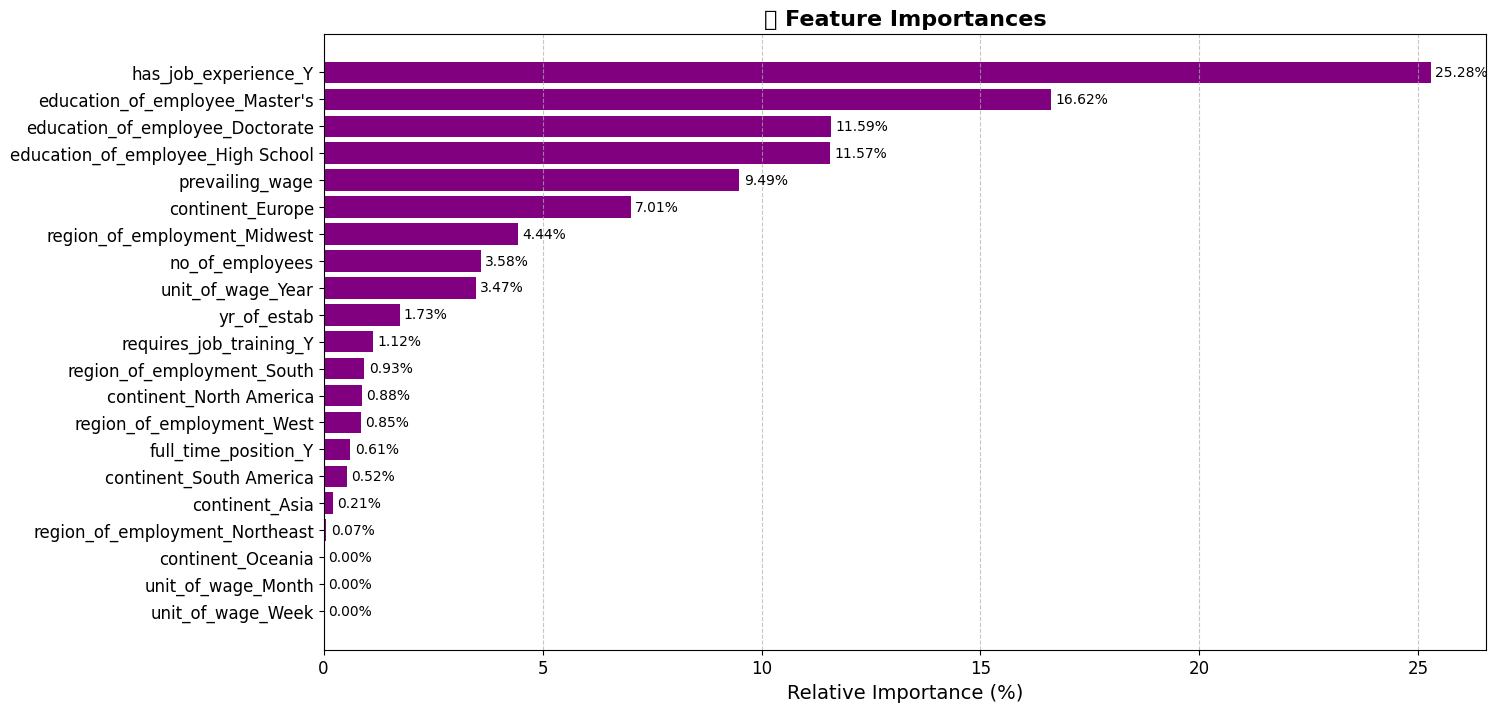

In [80]:
# Extract feature importances from the tuned model
feature_names = X_train.columns
importances = tuned_model_ada_under_sampled.feature_importances_

# Sorting indices in descending order (most important feature first)
indices = np.argsort(importances)[::-1]  # Reverse the sorting order

# Creating a better visual representation
plt.figure(figsize=(15, 8))
plt.title("🔍 Feature Importances", fontsize=16, fontweight="bold")
bars = plt.barh(range(len(indices)), importances[indices] * 100, color="purple", align="center")  # Convert to %

# Adding importance values next to each bar
for bar, value in zip(bars, importances[indices] * 100):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f"{value:.2f}%",
             va='center', fontsize=10, color='black')

# Formatting
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Relative Importance (%)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Keep highest importance at the top
plt.show()

## Actionable Insights and Recommendations

**Observations and Insights**


*   Job experience (has_job_experience_Y) is the most influential factor (25.28%), Applicants with prior experience have a significantly higher chance of approval.
*   Education is a major driver of visa approvals, with the following impact:
	•	Master’s degree (16.62%)
	•	Doctorate (11.59%)
	•	High School (11.57%)

*   Prevailing wage contributes 9.49% to visa approval likelihood.
	•	Higher wages increase approval chances because they indicate a strong labor demand for the role.
*   Europe (7.01%) and the Midwest region (4.44%) have higher approval correlations.
	•	This suggests visa demand is high in these areas, possibly due to labor shortages or regional policies.


*   Number of employees (3.58%) and year of establishment (1.73%) impact approvals.
	•	Larger and older companies tend to have higher approval rates, likely due to credibility and job security.
  
*   Full-time jobs (0.61%) have a small but meaningful impact on approvals.
	•	While not the top factor, part-time positions are slightly more likely to be denied.









**Recommendations**

**Certify:**
*  Certify applicants who have prior job experience in their field.
*  Certify applicants with a Master’s or Doctorate as they have the highest approval probability. High School graduates may still be approved if they have relevant work experience.
*  Certify applicants with wages above the prevailing wage
*  Certify applicants in Europe and Midwest regions with strong qualifications
*  Certify applications from employers with a large workforce and long operational history.
*  Certify full-time positions when combined with other strong factors (experience, education, wage).

**Deny:**

*   Deny applicants without experience, unless they have compensating factors like a Doctorate or exceptional skills.
*   Deny applicants with low education and no job experience.
*   Deny applications where offered wages are too low, as they may raise compliance concerns with labor laws.
*   Review applicants in other regions more critically, especially if they lack high-demand skills.
*   Deny applications from new or very small companies, unless they demonstrate strong stability across education, prior job experience and wage is above prevailing wage.
*   Deny part-time roles unless they offer high wages or specialized skills.



